In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Logistic regression


Logistic Regression - Accuracy: 0.6189881324172393

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      3489
           1       0.60      0.48      0.54      2915

    accuracy                           0.62      6404
   macro avg       0.62      0.61      0.61      6404
weighted avg       0.62      0.62      0.61      6404



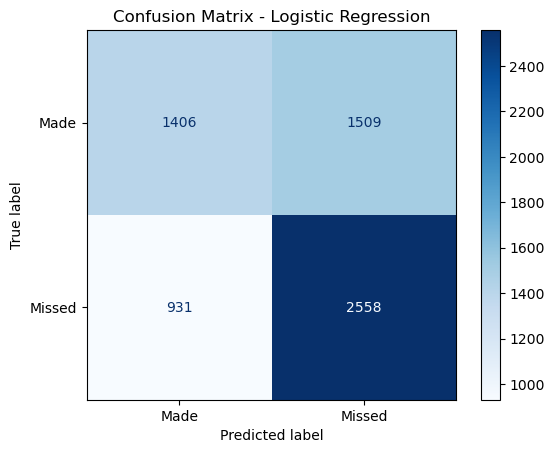

In [4]:
file_path = r"./data/shot_logs.csv"
df = pd.read_csv(file_path)

df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(df['SHOT_CLOCK'].median())

def convert_time_to_seconds(clock):
    if isinstance(clock, str):
        minutes, seconds = map(int, clock.split(":"))
        return minutes * 60 + seconds
    return None

df['GAME_CLOCK'] = df['GAME_CLOCK'].apply(convert_time_to_seconds)

df['LOCATION_NUM'] = df['LOCATION'].map({'H': 1, 'A': 0})
df['W_NUM'] = df['W'].map({'W': 1, 'L': 0})

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

model = LogisticRegression(penalty='l2', C=0.1, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nLogistic Regression - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# SVN

Data standardization done
Data split done
Model fit done

SVM - Accuracy: 0.594383775351014

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       349
           1       0.59      0.37      0.45       292

    accuracy                           0.59       641
   macro avg       0.59      0.58      0.56       641
weighted avg       0.59      0.59      0.57       641



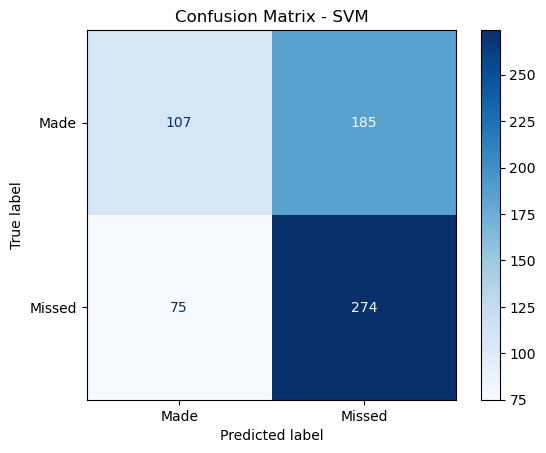

In [5]:
encoder = LabelEncoder()
df = df.sample(frac=.1, random_state=42)
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardization done")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)
print("Data split done")

# SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
print("Model fit done")

y_pred = svm_model.predict(X_test)

print("\nSVM - Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Made", "Missed"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

# Nerual network

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

encoder = LabelEncoder()
df['CLOSEST_DEFENDER_ENCODED'] = encoder.fit_transform(df['CLOSEST_DEFENDER'])

features = [
    'SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'DRIBBLES', 'PTS_TYPE',
    'FINAL_MARGIN', 'SHOT_NUMBER', 'GAME_CLOCK', 'PERIOD', 'LOCATION_NUM', 'W_NUM'
]
X = df[features]
y = df['SHOT_RESULT'].map({'made': 1, 'missed': 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the first network
class FirstNetwork(nn.Module):
    def __init__(self):
        super(FirstNetwork, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 50)
        self.output = nn.Linear(50, 1)
        self.sigmoid = nn.Sigmoid()
        self.l2_reg = 0.01

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model1 = FirstNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model1.parameters(), weight_decay=model1.l2_reg)

# Train the first network
for epoch in range(50):
    model1.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model1(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate the first network
model1.eval()
with torch.no_grad():
    y_pred1 = model1(X_test_tensor).round()
    y_pred1 = y_pred1.numpy()

print("\nFirst Network - Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

cm1 = confusion_matrix(y_test, y_pred1, labels=[1, 0])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=["Made", "Missed"])
disp1.plot(cmap="Blues")
plt.title("Confusion Matrix - First Network")
plt.show()


ModuleNotFoundError: No module named 'torch'

# Druga mreža

In [ ]:
# Define the second network
class SecondNetwork(nn.Module):
    def __init__(self):
        super(SecondNetwork, self).__init__()
        self.hidden = nn.Linear(X_train.shape[1], 50)
        self.output = nn.Linear(50, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.l2_reg = 0.01

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model2 = SecondNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model2.parameters(), weight_decay=model2.l2_reg)

# Train the second network
for epoch in range(50):
    model2.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model2(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate the second network
model2.eval()
with torch.no_grad():
    y_pred2 = model2(X_test_tensor).round()
    y_pred2 = y_pred2.numpy()

print("\nSecond Network - Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

cm2 = confusion_matrix(y_test, y_pred2, labels=[1, 0])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=["Made", "Missed"])
disp2.plot(cmap="Blues")
plt.title("Confusion Matrix - Second Network")
plt.show()